In [3]:
# Purpose: Calculate LST

In [1]:
!pip install rasterio

In [5]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# open band 4 red
band4 = rasterio.open('landsat/LC08_L1TP_195021_20180603_20200831_02_T1_B4.tif') #red

#number of raster rows
band4.height
#number of raster columns
band4.width
#plot band 
plt.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [9]:
# Open band 5 near-infrared
band5 = rasterio.open("landsat/LC08_L1TP_195021_20180603_20200831_02_T1_B5.tif") #nir


Min: 0.0
Max: 35977.0
Mean: 16932.53463049358
Unique Values: [    0. 19650. 19651. ... 35846. 35948. 35977.]


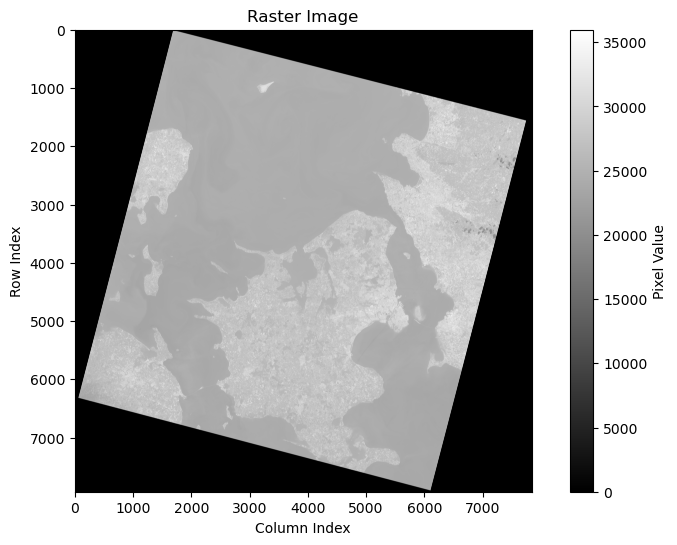

In [11]:
# Open band 10
band10 = rasterio.open('landsat/LC08_L1TP_195021_20180603_20200831_02_T1_B10.tif') #red

# Debugging: Check NDVI values
print("Min:", np.min(band10.read(1).astype('float64')))
print("Max:", np.max(band10.read(1).astype('float64')))
print("Mean:", np.mean(band10.read(1).astype('float64')))
print("Unique Values:", np.unique(band10.read(1).astype('float64')))

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(band10.read(1).astype('float64'), cmap='gray')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

atmo_spec_rad Min: -0.18999999999999997
atmo_spec_rad Max: 11.833513400000001
atmo_spec_rad Mean: 5.468853073510934
atmo_spec_rad Unique Values: [-0.19       6.37703    6.3773642 ... 11.7897332 11.8238216 11.8335134]


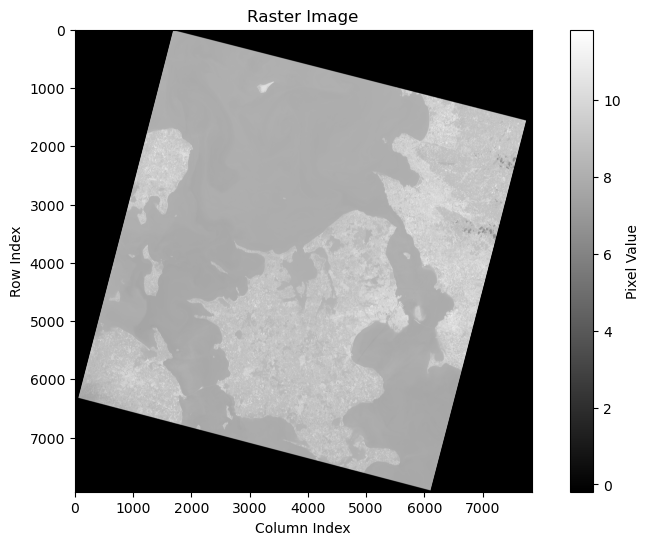

In [14]:
#F1.3.1 Atmosphere spectral radiance of band 10
#ML = band-specific multiplicative rescaling factor = RADIANCE_MULT_BAND_10 = 3.3420E-04
#Qcal = band 10
#AL = band-specific additive rescaling factor = RADIANCE_ADD_BAND_10 = 0.10000
# Convert DN to TOA reflectance
atmo_spec_rad_band10 = 0.0003342 * band10.read(1).astype('float64') + 0.10000-0.29

# Debugging: Check NDVI values
print("atmo_spec_rad Min:", np.min(atmo_spec_rad_band10))
print("atmo_spec_rad Max:", np.max(atmo_spec_rad_band10))
print("atmo_spec_rad Mean:", np.mean(atmo_spec_rad_band10))
print("atmo_spec_rad Unique Values:", np.unique(atmo_spec_rad_band10))

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(atmo_spec_rad_band10, cmap='gray')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

C:\Users\idarei\AppData\Local\Temp\ipykernel_15808\3249563911.py:4: RuntimeWarning: invalid value encountered in log
  brigthness_temp = (1321.0789/np.log((774.8853/atmo_spec_rad_band10)+1))-273.15


brigthness_temp Min: nan
brigthness_temp Max: nan
brigthness_temp Mean: nan
brigthness_temp Unique Values: [ 1.60491065  1.60788084  1.61382094 ... 41.56176781 41.62228377
         nan]


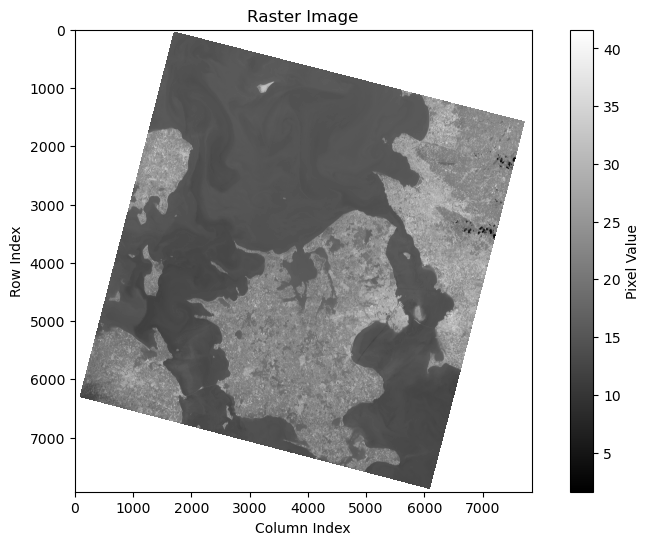

In [17]:
#F1.3 Brigtness temperature
# K1 = the first band-specific calibration constant = 774.89 = K1_CONSTANT_BAND_10 = 774.8853
# K2 = the second band-specific calibration constant = 1321.08 = K2_CONSTANT_BAND_10 = 1321.0789
brigthness_temp = (1321.0789/np.log((774.8853/atmo_spec_rad_band10)+1))-273.15
#brigthness_temp = 1321.0789/(np.log(774.8853/(atmo_spec_rad+1)))-273.15
# this is the standard method: Tb = K2 / np.log((K1 / L) + 1)

# Debugging: Check NDVI values
print("brigthness_temp Min:", np.min(brigthness_temp))
print("brigthness_temp Max:", np.max(brigthness_temp))
print("brigthness_temp Mean:", np.mean(brigthness_temp))
print("brigthness_temp Unique Values:", np.unique(brigthness_temp))

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(brigthness_temp, cmap='gray')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

C:\Users\idarei\AppData\Local\Temp\ipykernel_15808\2442283007.py:9: RuntimeWarning: invalid value encountered in divide
  (nir - red) / (nir + red)


ndvi Min: -1.0
ndvi Max: 1.0
ndvi Mean: 0.09291638718826434
ndvi Unique Values: [-1.         -0.32866945 -0.30770512 ...  0.65101916  0.65193566
  1.        ]


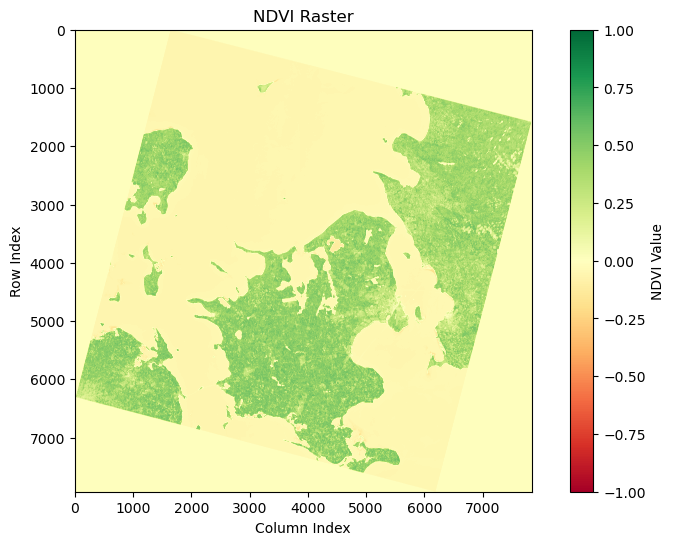

In [19]:
#F1.2.1.1 NDVI
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

# NDVI calculation, setting empty or no-data cells to 0
ndvi = np.where(
    (nir + red) == 0.,  # Avoid division by zero
    0, 
    (nir - red) / (nir + red)
)

# Debugging: Check NDVI values
print("ndvi Min:", np.min(ndvi))
print("ndvi Max:", np.max(ndvi))
print("ndvi Mean:", np.mean(ndvi))
print("ndvi Unique Values:", np.unique(ndvi))

# Display NDVI raster
fig = plt.figure(figsize=(10, 6))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)  # Use 'RdYlGn' for vegetation contrast
plt.colorbar(label="NDVI Value")
plt.title("NDVI Raster")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

prop_of_veg Min: 0.0
prop_of_veg Max: 1.0
prop_of_veg Mean: 0.5464581935941322
prop_of_veg Unique Values: [0.         0.33566528 0.34614744 ... 0.82550958 0.82596783 1.        ]


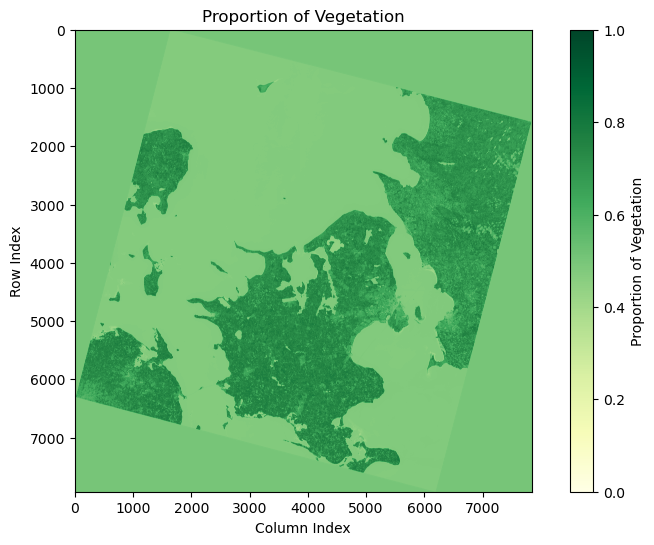

In [21]:
#F1.2.1 Proportion of vegetation 

prop_of_veg = (ndvi-np.min(ndvi))/(np.max(ndvi)-np.min(ndvi))

# Debugging: Check NDVI values
print("prop_of_veg Min:", np.min(prop_of_veg))
print("prop_of_veg Max:", np.max(prop_of_veg))
print("prop_of_veg Mean:", np.mean(prop_of_veg))
print("prop_of_veg Unique Values:", np.unique(prop_of_veg))

# Plot the NDVI raster
plt.figure(figsize=(10, 6))
plt.imshow(prop_of_veg, cmap='YlGn', vmin=np.min(prop_of_veg), vmax=np.max(prop_of_veg))  # 'YlGn' for vegetation
plt.colorbar(label="Proportion of Vegetation")
plt.title("Proportion of Vegetation")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()


emissivity Min: 0.986
emissivity Max: 0.99
emissivity Mean: 0.9881858327743746
emissivity Unique Values: [0.986      0.98734266 0.98738459 ... 0.98930204 0.98930387 0.99      ]


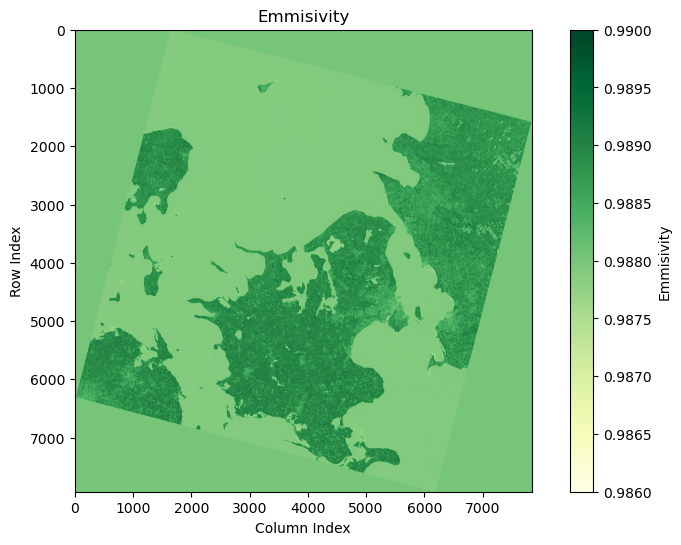

In [22]:
# F1.2 land surface emmisivity
emissivity=0.004*prop_of_veg+0.986

# Debugging: Check NDVI values
print("emissivity Min:", np.min(emissivity))
print("emissivity Max:", np.max(emissivity))
print("emissivity Mean:", np.mean(emissivity))
print("emissivity Unique Values:", np.unique(emissivity))

# Plot the NDVI raster
plt.figure(figsize=(10, 6))
plt.imshow(emissivity, cmap='YlGn', vmin=np.min(emissivity), vmax=np.max(emissivity))  # 'YlGn' for vegetation
plt.colorbar(label="Emmisivity")
plt.title("Emmisivity")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

lst Min: nan
lst Max: nan
lst Mean: nan
lst Unique Values: [ 1.60493402  1.60790429  1.61384458 ... 41.5774886  41.63807236
         nan]


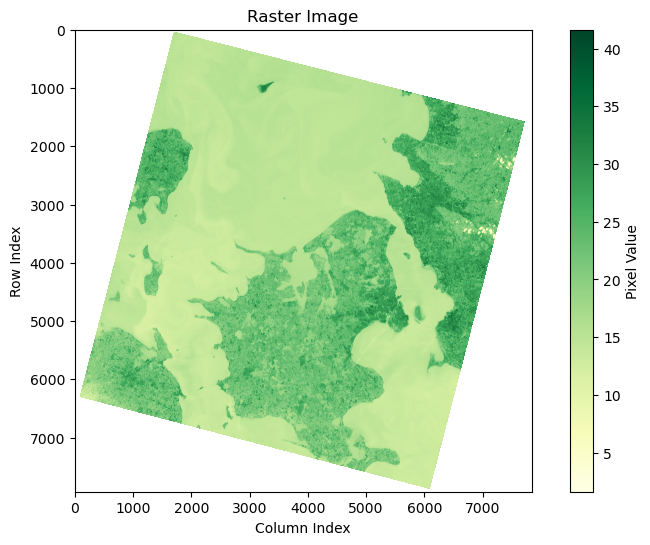

In [25]:
#F1.1 Constant P
#h=6.626*10^(-34)
#c=2.998*(10^8)
#bolz=1.38*10^(-23)
constant_p = 6.626e-34 * (2.998e8) / (1.38e-23) # in m·K
# Convert to µm·K (multiply by 10^6)
constant_p_micrometer = constant_p * 1e6

#F1 Land surface temperature
lst = brigthness_temp/(1+10.9*(brigthness_temp/constant_p_micrometer)*np.log(emissivity))
#lst = brigthness_temp/(1+10.9*(brigthness_temp/14388)*np.log(emissivity))

# Debugging: Check NDVI values
print("lst Min:", np.min(lst))
print("lst Max:", np.max(lst))
print("lst Mean:", np.mean(lst))
print("lst Unique Values:", np.unique(lst))

# Plot the raster data
plt.figure(figsize=(10, 6))
plt.imshow(lst, cmap='YlGn')  # Use 'gray' or 'viridis'
plt.colorbar(label="Pixel Value")
plt.title("Raster Image")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

#Source: https://riski-saputra.medium.com/mapping-land-surface-temperature-lst-using-landsat-8-imagery-in-arcmap-99bd64f2c3fa